In [ ]:
# import libraries
import pandas as pd
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import  cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
import joblib
import seaborn as sns

## **Project overview**

We aim to create a regression model to predict the prepayment rate and associated risks for our Mortgage-Backed Securities (MBS).
before we have researched the main factors that influence the prepayment rate and how it affects the MBS sector.

First we need to analyze historical prepayment data to identify any trends or patterns.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
Prepayment_data= pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/PrepaymentData.csv')

In [ ]:
Prepayment_data.head()

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Cluster,PC1,PC2,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
0,0,1,71,0.21,116000,6.875,360,2,0,0,163,0,1.187511,0.763662,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,0,0,3,0.000000,0.452778,0.000000,6.074182e+06,0.005729,762.037424,3628.749637,4.761905
1,0,1,79,0.28,96000,6.875,360,1,1,1,165,0,0.342465,2.353520,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,0,0,3,0.006061,0.458333,0.002778,5.026909e+06,0.005729,630.651661,2252.327361,3.571429
2,0,1,65,0.25,66000,6.625,360,2,0,0,65,0,1.575855,-0.088092,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.180556,0.000000,3.586415e+06,0.005521,422.605234,1690.420937,4.000000
3,0,1,64,0.22,125000,6.875,360,2,0,0,55,0,1.493665,-0.471742,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.152778,0.000000,6.545455e+06,0.005729,821.161017,3732.550078,4.545455
4,0,1,66,0.37,65000,6.875,360,2,0,0,133,0,1.423920,0.779804,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,0,0,2,0.000000,0.369444,0.000000,3.403636e+06,0.005729,427.003729,1154.064132,2.702703


Drop irrelevant columns

In [ ]:
Prepayment_data.drop(['Cluster','PC1','PC2'],axis=1,inplace=True)

In [ ]:
Prepayment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194380 entries, 0 to 194379
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MIP                             194380 non-null  int64  
 1   Units                           194380 non-null  int64  
 2   OCLTV                           194380 non-null  int64  
 3   DTI                             194380 non-null  float64
 4   OrigUPB                         194380 non-null  int64  
 5   OrigInterestRate                194380 non-null  float64
 6   OrigLoanTerm                    194380 non-null  int64  
 7   NumBorrowers                    194380 non-null  int64  
 8   EverDelinquent                  194380 non-null  int64  
 9   MonthsDelinquent                194380 non-null  int64  
 10  MonthsInRepayment               194380 non-null  int64  
 11  isHomeFirstBuyer                194380 non-null  int64  
 12  PPM_Encoded     

In [ ]:
Prepayment_data

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
0,0,1,71,0.21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,0,0,3,0.000000,0.452778,0.000000,6.074182e+06,0.005729,762.037424,3628.749637,4.761905
1,0,1,79,0.28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,0,0,3,0.006061,0.458333,0.002778,5.026909e+06,0.005729,630.651661,2252.327361,3.571429
2,0,1,65,0.25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.180556,0.000000,3.586415e+06,0.005521,422.605234,1690.420937,4.000000
3,0,1,64,0.22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.152778,0.000000,6.545455e+06,0.005729,821.161017,3732.550078,4.545455
4,0,1,66,0.37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,0,0,2,0.000000,0.369444,0.000000,3.403636e+06,0.005729,427.003729,1154.064132,2.702703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194375,0,1,75,0.51,31000,8.000,360,1,0,0,52,0,0,0.573742,0.525238,0.023510,0.062205,0.032029,0,5,1,0.000000,0.144444,0.000000,1.395000e+06,0.006667,227.467018,446.013761,1.960784
194376,0,1,60,0.32,90000,7.000,360,2,0,0,12,0,0,0.424460,0.309485,0.957294,0.830023,0.025901,0,5,0,0.000000,0.033333,0.000000,4.628571e+06,0.005833,598.772246,1871.163268,3.125000
194377,0,1,73,0.31,87000,5.625,313,1,0,0,38,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,0,5,0,0.000000,0.121406,0.000000,4.841067e+06,0.004687,530.567053,1711.506623,3.225806
194378,0,1,80,0.54,88000,7.000,360,2,0,0,32,0,0,0.424460,0.525238,0.023510,0.830023,0.025901,1,5,0,0.000000,0.088889,0.000000,4.525714e+06,0.005833,585.466196,1084.196659,1.851852


To determine the prepayment amount we need to calculate various key metrics related to mortgage payments, including the EMI, total payments, interest amounts, monthly income and  remaining principal.

to calculate EMI we can use the folowing formula:

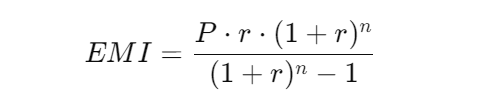

In [ ]:
# Calculate Monthly Interest Rate
Prepayment_data['MonthlyInterestRate'] = Prepayment_data['OrigInterestRate'] / 1200

# Calculate EMI
Prepayment_data['EMI'] = Prepayment_data.apply(lambda row: (row['OrigUPB'] * row['MonthlyInterestRate'] * (1 + row['MonthlyInterestRate']) ** row['OrigLoanTerm']) /
                                      ((1 + row['MonthlyInterestRate']) ** row['OrigLoanTerm'] - 1), axis=1)

# Calculate Total Payment and Interest Amount based on EMI and loan duration
Prepayment_data['TotalPayment'] = Prepayment_data['EMI'] * Prepayment_data['OrigLoanTerm']
# Calculate Interest amount by sbstracting  Totalpayment with OrigUPB
Prepayment_data['InterestAmount'] = Prepayment_data['TotalPayment'] - Prepayment_data['OrigUPB']

# Determine  Monthly Income based on DTI and EMI
Prepayment_data['MonthlyIncome'] = Prepayment_data['EMI'] / Prepayment_data['DTI']

We need to define a function that can calculate the remaining principal

In [ ]:
def calculate_remaining_principal(monthly_rate, amount, emi, months_in_repayment):
    for i in range(months_in_repayment):
        interest = monthly_rate * amount
        principal_payment = emi - interest
        amount -= principal_payment
    return amount

apply the function

In [ ]:
Prepayment_data['RemainingPrincipal'] = np.vectorize(calculate_remaining_principal)(
    Prepayment_data["MonthlyInterestRate"],   # Column containing the monthly interest rate
    Prepayment_data["OrigUPB"],               # Column containing the original principal (loan amount)
    Prepayment_data["EMI"],                   # Column containing the monthly payment
    Prepayment_data["MonthsInRepayment"]      # Column containing the number of months in repayment
)

# Display the updated DataFrame with the calculated Remaining Principal
Prepayment_data[['OrigUPB', 'EMI', 'MonthsInRepayment', 'MonthlyInterestRate', 'RemainingPrincipal']]


,OrigUPB,EMI,MonthsInRepayment,MonthlyInterestRate,RemainingPrincipal
0,116000,762.037424,163,0.005729,89846.438873
1,96000,630.651661,165,0.005729,73945.189815
2,66000,422.605234,65,0.005521,61461.726104
3,125000,821.161017,55,0.005729,118233.136295
4,65000,427.003729,133,0.005729,54154.431697
...,...,...,...,...,...
194375,31000,227.467018,52,0.006667,29712.294953
194376,90000,598.772246,12,0.005833,89085.771154
194377,87000,530.567053,38,0.004687,81907.094623
194378,88000,585.466196,32,0.005833,85470.337416


We estimate Savings based on these conditions:
- If the DTI is less than 0.40, the savings are estimated as 50% of the monthly income.
- Otherwise, savings are estimated as 75% of the monthly income.

In [ ]:
# Calculate Savings
Prepayment_data['Savings'] = Prepayment_data.apply(lambda row: 0.50 * row['MonthlyIncome'] if row['DTI'] < 0.40 else 0.75 * row['MonthlyIncome'], axis=1)

# Total Savings over 2 years
Prepayment_data['TotalSavings'] = Prepayment_data['Savings'] * 24

In [ ]:
# Pre-Payment Amount
Prepayment_data['PrePaymentAmount'] = Prepayment_data['TotalSavings'] - (Prepayment_data['EMI'] * 24)

In [ ]:
# Update Principal after Pre-Payment
Prepayment_data['NewPrincipalAfterPrePayment'] = Prepayment_data['RemainingPrincipal'] - Prepayment_data['PrePaymentAmount']

# Consider EverDelinquent condition
Prepayment_data.loc[Prepayment_data['EverDelinquent'] == 1, 'NewPrincipalAfterPrePayment'] = Prepayment_data['RemainingPrincipal']


In [ ]:
Prepayment_data[['OrigUPB', 'EMI', 'TotalPayment', 'InterestAmount', 'MonthlyIncome', 'RemainingPrincipal', 'PrePaymentAmount', 'NewPrincipalAfterPrePayment']]

,OrigUPB,EMI,TotalPayment,InterestAmount,MonthlyIncome,RemainingPrincipal,PrePaymentAmount,NewPrincipalAfterPrePayment
0,116000,762.037424,274333.472591,158333.472591,3628.749637,89846.438873,25256.097477,64590.341397
1,96000,630.651661,227034.598006,131034.598006,2252.327361,73945.189815,11892.288467,73945.189815
2,66000,422.605234,152137.884351,86137.884351,1690.420937,61461.726104,10142.525623,51319.200481
3,125000,821.161017,295617.966154,170617.966154,3732.550078,118233.136295,25082.736522,93150.399773
4,65000,427.003729,153721.342400,88721.342400,1154.064132,54154.431697,3600.680092,50553.751605
...,...,...,...,...,...,...,...,...
194375,31000,227.467018,81888.126445,50888.126445,446.013761,29712.294953,2569.039261,27143.255692
194376,90000,598.772246,215558.008438,125558.008438,1871.163268,89085.771154,8083.425316,81002.345837
194377,87000,530.567053,166067.487620,79067.487620,1711.506623,81907.094623,7804.470200,74102.624423
194378,88000,585.466196,210767.830473,122767.830473,1084.196659,85470.337416,5464.351160,80005.986255


In [ ]:
Prepayment_data

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR,EMI,TotalPayment,InterestAmount,MonthlyIncome,RemainingPrincipal,Savings,TotalSavings,PrePaymentAmount,NewPrincipalAfterPrePayment
0,0,1,71,0.21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,0,0,3,0.000000,0.452778,0.000000,6.074182e+06,0.005729,762.037424,3628.749637,4.761905,762.037424,274333.472591,158333.472591,3628.749637,89846.438873,1814.374819,43544.995649,25256.097477,64590.341397
1,0,1,79,0.28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,0,0,3,0.006061,0.458333,0.002778,5.026909e+06,0.005729,630.651661,2252.327361,3.571429,630.651661,227034.598006,131034.598006,2252.327361,73945.189815,1126.163681,27027.928334,11892.288467,73945.189815
2,0,1,65,0.25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.180556,0.000000,3.586415e+06,0.005521,422.605234,1690.420937,4.000000,422.605234,152137.884351,86137.884351,1690.420937,61461.726104,845.210469,20285.051247,10142.525623,51319.200481
3,0,1,64,0.22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.152778,0.000000,6.545455e+06,0.005729,821.161017,3732.550078,4.545455,821.161017,295617.966154,170617.966154,3732.550078,118233.136295,1866.275039,44790.600932,25082.736522,93150.399773
4,0,1,66,0.37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,0,0,2,0.000000,0.369444,0.000000,3.403636e+06,0.005729,427.003729,1154.064132,2.702703,427.003729,153721.342400,88721.342400,1154.064132,54154.431697,577.032066,13848.769586,3600.680092,50553.751605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194375,0,1,75,0.51,31000,8.000,360,1,0,0,52,0,0,0.573742,0.525238,0.023510,0.062205,0.032029,0,5,1,0.000000,0.144444,0.000000,1.395000e+06,0.006667,227.467018,446.013761,1.960784,227.467018,81888.126445,50888.126445,446.013761,29712.294953,334.510320,8028.247691,2569.039261,27143.255692
194376,0,1,60,0.32,90000,7.000,360,2,0,0,12,0,0,0.424460,0.309485,0.957294,0.830023,0.025901,0,5,0,0.000000,0.033333,0.000000,4.628571e+06,0.005833,598.772246,1871.163268,3.125000,598.772246,215558.008438,125558.008438,1871.163268,89085.771154,935.581634,22453.959212,8083.425316,81002.345837
194377,0,1,73,0.31,87000,5.625,313,1,0,0,38,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,0,5,0,0.000000,0.121406,0.000000,4.841067e+06,0.004687,530.567053,1711.506623,3.225806,530.567053,166067.487620,79067.487620,1711.506623,81907.094623,855.753311,20538.079475,7804.470200,74102.624423
194378,0,1,80,0.54,88000,7.000,360,2,0,0,32,0,0,0.424460,0.525238,0.023510,0.830023,0.025901,1,5,0,0.000000,0.088889,0.000000,4.525714e+06,0.005833,585.466196,1084.196659,1.851852,585.466196,210767.830473,122767.830473,1084.196659,85470.337416,813.147494,19515.539859,5464.351160,80005.986255


In [ ]:
Prepayment_data.isna().sum()

,0
MIP,0
Units,0
OCLTV,0
DTI,0
OrigUPB,0
OrigInterestRate,0
OrigLoanTerm,0
NumBorrowers,0
EverDelinquent,0
MonthsDelinquent,0


Let's explore the meaning of each column:
- MIP: Mortgage Insurance Premium.
- Units: Number of units in the property (e.g., single-family, multi-family).
- OCLTV: Original Combined Loan-to-Value ratio.
- DTI: Debt-to-Income ratio.
- OrigUPB: Original Unpaid Principal Balance.
- OrigInterestRate: Original Interest Rate of the loan.
- OrigLoanTerm: Original Loan Term in months.
- NumBorrowers: Number of Borrowers.
- EverDelinquent: Whether the borrower has ever been delinquent on the loan (1 for Yes, 0 for No).
- MonthsDelinquent: Number of months the loan has been delinquent.
- MonthsInRepayment: Number of months the loan has been in repayment.
- isHomeFirstBuyer: Whether the borrower is a first-time homebuyer (1 for Yes, 0 for No).
- PPM_Encoded: Encoded value for Prepayment Penalty Mortgage.
- Channel_Frequency: Frequency encoding for the loan origination channel.
- LoanPurpose_Frequency: Frequency encoding for the purpose of the loan.
- Occupancy_Frequency: Frequency encoding for occupancy type (e.g., owner-occupied, investment).
- PropertyType_Frequency: Frequency encoding for the property type.
- PropertyState_Frequency: Frequency encoding for the property state.
- LTV_Group_Encoded: Encoded Loan-to-Value ratio group.
- FICO_Category_Encoded: Encoded FICO score category.
- YearsInRepayment_Group_Encoded: Encoded grouping for the number of years in repayment.
- DelinquencyRatio: Ratio of months delinquent to months in repayment.
- PaymentProgressRatio: Ratio of payments made to total payments expected.
- DelinquentLoanTermRatio: Ratio of months delinquent to the original loan term.
- LoanAmortizationFactor: Factor related to the amortization of the loan.
- MonthlyInterestRate: Monthly interest rate derived from the annual rate.
- MonthlyLoanPayment: Monthly payment amount.
- EstimatedMonthlyIncome: Estimated monthly income of the borrower.
- DSCR: Debt Service Coverage Ratio.
- EMI: Equated Monthly Installment (same as MonthlyLoanPayment).
- TotalPayment: Total payment made over the loan term.
- InterestAmount: Total interest paid over the loan term.
- MonthlyIncome: Monthly income of the borrower.
- RemainingPrincipal: Principal amount remaining after payments.
- Savings: Savings amount after the loan term.
- TotalSavings: Total savings after the loan term.
- PrePaymentAmount: Amount paid in prepayments.
- NewPrincipalAfterPrePayment: New principal balance after prepayment.

### **Exploratory Data Analysis**

1. Univaraiate Analaysis

As we want to predict the prepayment amount we need analyze the target distribution

In [ ]:
Prepayment_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR', 'EMI', 'TotalPayment',
       'InterestAmount', 'MonthlyIncome', 'RemainingPrincipal', 'Savings',
       'TotalSavings', 'PrePaymentAmount', 'NewPrincipalAfterPrePayment'],
      dtype='object')

<Axes: xlabel='PrePaymentAmount', ylabel='Count'>

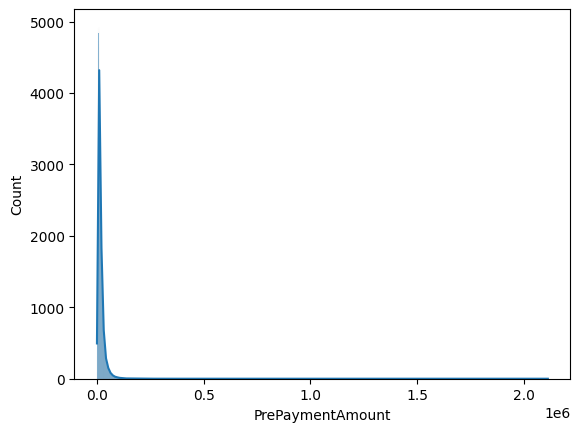

In [ ]:
sns.histplot(Prepayment_data.PrePaymentAmount,kde=True)

We note the following:

- There a high count for prepaymnet amount ranging from 0 to 20000
which means the majority of borrowers  can pay between O to 20000 dolars.

Let's analyze the remaining principal prepayment amount ratio.

In [ ]:
Prepayment_data['RemainingPrincipal_PrePaymentAmount_Ratio'] = Prepayment_data['PrePaymentAmount'] / Prepayment_data['RemainingPrincipal']

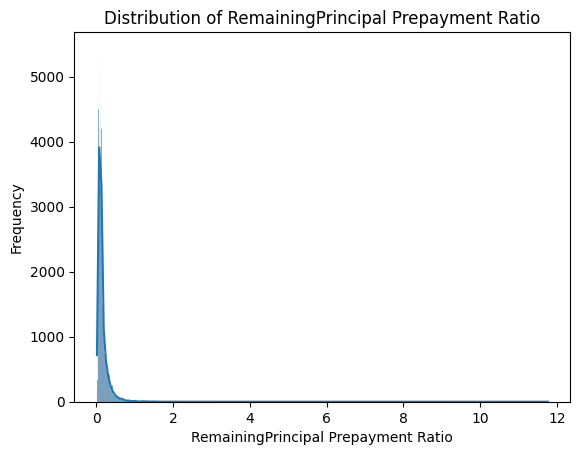

In [ ]:
sns.histplot(Prepayment_data.RemainingPrincipal_PrePaymentAmount_Ratio, kde=True)
plt.title('Distribution of RemainingPrincipal Prepayment Ratio')
plt.xlabel('RemainingPrincipal Prepayment Ratio')
plt.ylabel('Frequency')
plt.show()


 The original Unpaid Bakance prepayment amount ratio.

<Axes: xlabel='OrigUPB_PrePaymentAmount_Ratio', ylabel='Count'>

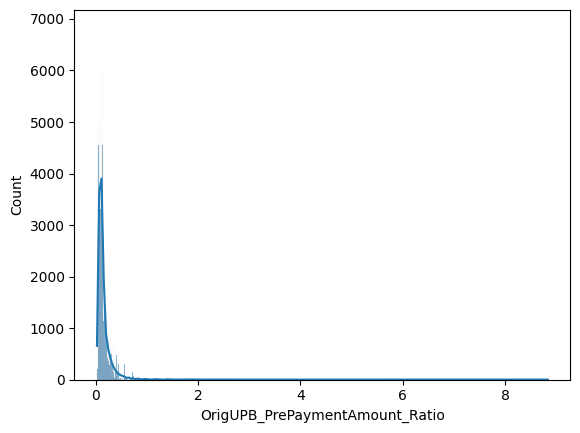

In [ ]:
Prepayment_data['OrigUPB_PrePaymentAmount_Ratio'] = Prepayment_data['PrePaymentAmount'] / Prepayment_data['OrigUPB']
sns.histplot(Prepayment_data.OrigUPB_PrePaymentAmount_Ratio, kde=True)


2. Bivariate Analysis

Pair plots shows diffrent distributions for each two columns

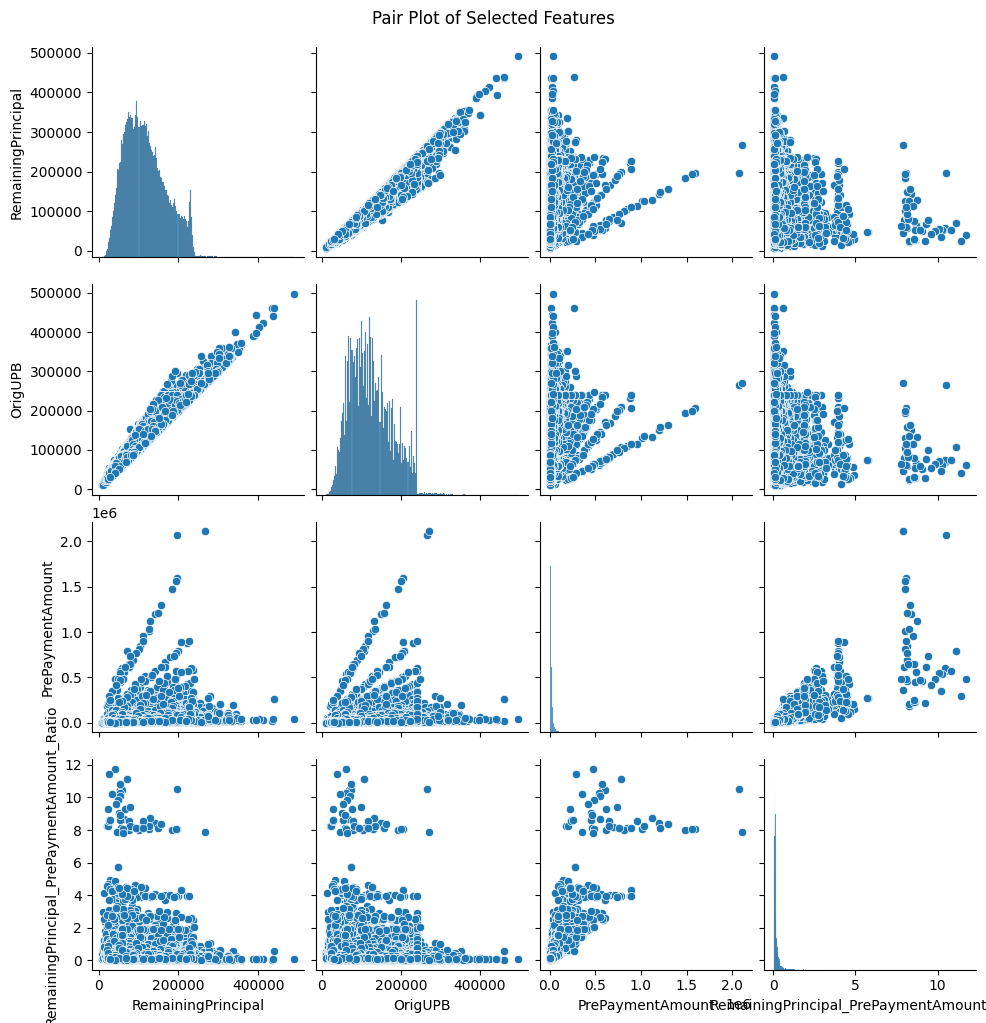

In [ ]:
sns.pairplot(Prepayment_data[['RemainingPrincipal', 'OrigUPB', 'PrePaymentAmount', 'RemainingPrincipal_PrePaymentAmount_Ratio']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


From the distribution of the remaining prinicipal in terms of OrigUPB we can clearly see that they are linearly dependent.

we can distinguish between two disributions
- High density of data points with tow clusters:

If we take the RemainingPrincipal_PrepaymentAmountratio in terms of OrigUPB , RemaianingPrincipal and PrePayment Amount we have a high density of data points between 0% to 6% across the three features
in the other hand when  Percentage  ranging from 7.5% to 12% their values go from 0 to 250000 dolars.

-----> this indicate presence of two categories, high prepayment and low prepayment.
- High density of data points with one cluster:

the distrbution of prepayment in terms of Remaining Princiapl tends to be normal which indicate linear relationship between them whene the remaining princpal ranges from 200000 to 400000 the prepayment go near Zero.


Lets categorize the remainingprincipalPrepaymentAmount Ratio

In [ ]:
bins = [0, 0.25, 0.5, 0.75, 1, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
Prepayment_data['PrePayment_Ratio_Category'] = pd.cut(Prepayment_data['RemainingPrincipal_PrePaymentAmount_Ratio'], bins=bins, labels=labels)



In [ ]:
Prepayment_data.isna().sum()

,0
MIP,0
Units,0
OCLTV,0
DTI,0
OrigUPB,0
OrigInterestRate,0
OrigLoanTerm,0
NumBorrowers,0
EverDelinquent,0
MonthsDelinquent,0


In [ ]:
Prepayment_data.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/prepayment_data.csv')

In [ ]:
category_counts = Prepayment_data['PrePayment_Ratio_Category'].value_counts()

In [ ]:
import plotly.express as px
fig = px.pie(names=category_counts.index, values=category_counts.values, title='Prepayment Ratio Category Distribution')
fig.show()

 - We notice that most borrowers  can not prepay a high amount with percentage 85.6%.
 - With precence of small percentage near 0.5% of brrowers that are able to prepay with an important amount.

3. Multivariate analysis

In [ ]:
Prepayment_data=Prepayment_data.drop(columns=['PrePayment_Ratio_Category'])

Explore the coorelation between all columns with target var

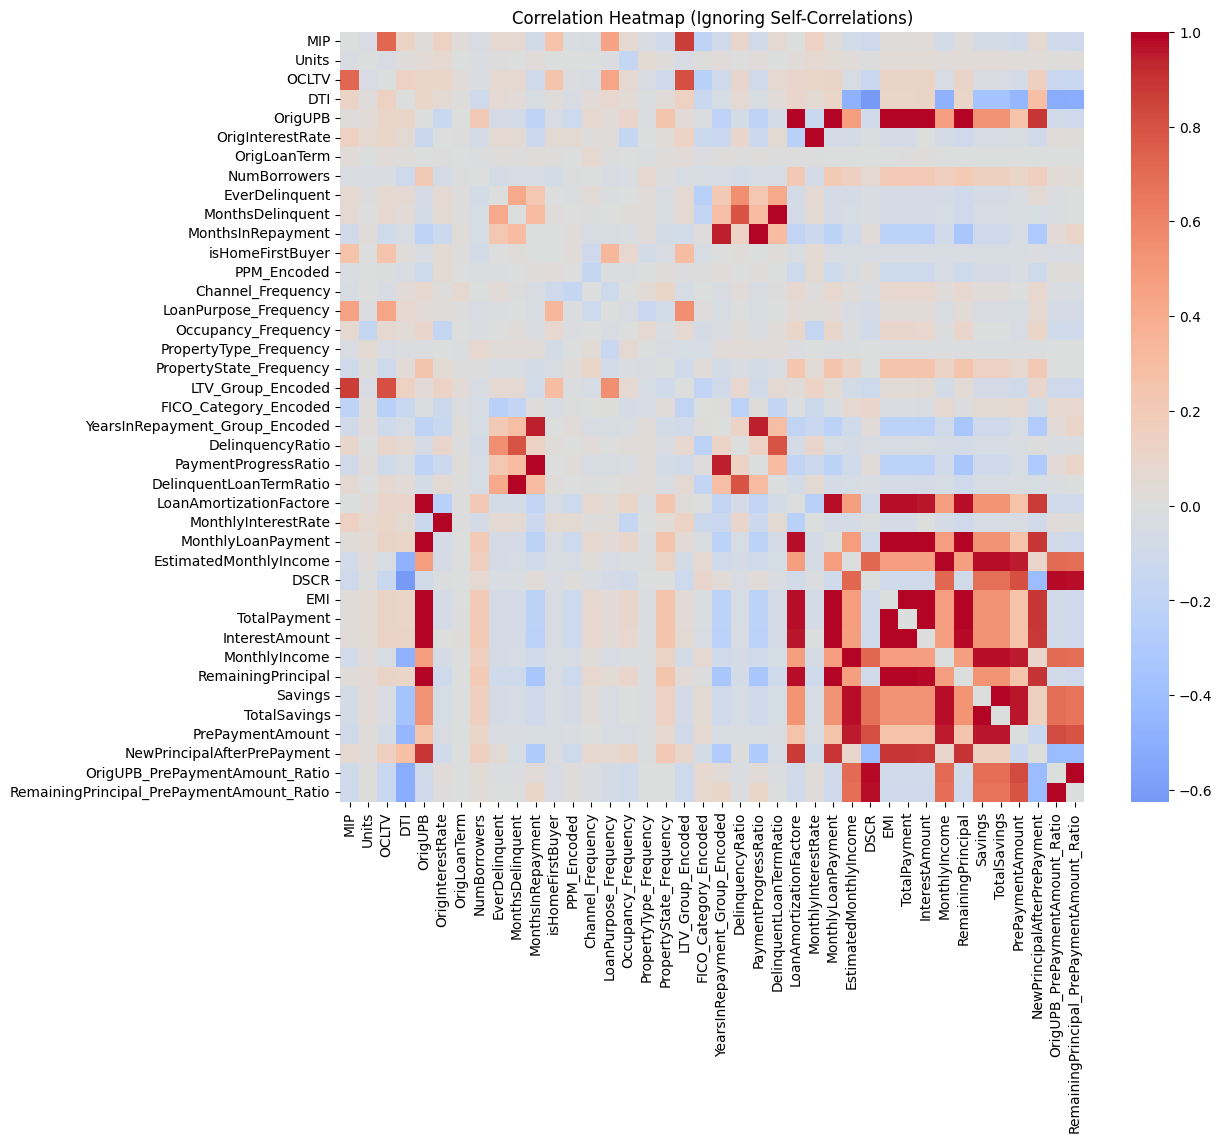

In [ ]:
# Calculate the correlation matrix
correlation_matrix = Prepayment_data.corr()

# Set diagonal values to 0 to ignore self-correlations
np.fill_diagonal(correlation_matrix.values, 0)

# Create a heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap (Ignoring Self-Correlations)')
plt.show()

In [ ]:
Prepayment_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR', 'EMI', 'TotalPayment',
       'InterestAmount', 'MonthlyIncome', 'RemainingPrincipal', 'Savings',
       'TotalSavings', 'PrePaymentAmount', 'NewPrincipalAfterPrePayment',
       'OrigUPB_PrePaymentAmount_Ratio',
       'RemainingPrincipal_PrePaymentAmount_Ratio'],
      dtype='object')

If we consider this correlation part whiche shows high correlated features
these features are very related with prepayment amount target variable

('LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR', 'EMI', 'TotalPayment',
       'InterestAmount', 'MonthlyIncome', 'RemainingPrincipal', 'Savings',
       'TotalSavings', 'PrePaymentAmount', 'NewPrincipalAfterPrePayment',
       'OrigUPB_PrePaymentAmount_Ratio',
       'RemainingPrincipal_PrePaymentAmount_Ratio')

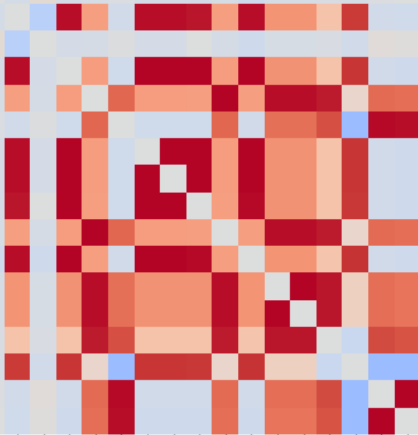

There a high negative correlation between DTI and the prepayment amount also

### **Data** **Normalization**

Normalization and scaling

In [ ]:
Prepayment_data.describe()

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR,EMI,TotalPayment,InterestAmount,MonthlyIncome,RemainingPrincipal,Savings,TotalSavings,PrePaymentAmount,NewPrincipalAfterPrePayment,OrigUPB_PrePaymentAmount_Ratio,RemainingPrincipal_PrePaymentAmount_Ratio
count,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,1.943800e+05,194380.000000,194380.000000,194380.000000,194380.000000,194380.000000,1.943800e+05,194380.000000,194380.000000,194380.000000,194380.000000,1.943800e+05,1.943800e+05,1.943800e+05,194380.000000,194380.000000
mean,10.343430,1.022338,78.031855,0.321198,125537.874267,6.939860,359.851086,1.642633,0.195221,1.816915,60.178383,0.129854,0.042597,0.510005,0.399089,0.918017,0.704173,0.048043,0.885847,2.135389,0.779545,0.022343,0.167223,0.005048,6.543146e+06,0.005783,828.722543,2958.473135,3.672870,828.722543,2.982107e+05,172672.815245,2958.473135,117726.656142,1593.810463,3.825145e+04,1.836211e+04,1.025604e+05,0.153728,0.166757
std,13.150371,0.183778,15.308476,0.108918,53163.750948,0.340617,2.094279,0.479225,0.396372,8.754581,44.683276,0.336143,0.201947,0.075694,0.140927,0.187647,0.278725,0.043384,0.846753,0.808627,1.000679,0.082519,0.124169,0.024323,2.821913e+06,0.000284,349.306308,2316.279449,2.640810,349.306308,1.256875e+05,72867.371316,2316.279449,51920.052166,1144.715742,2.747318e+04,2.407354e+04,5.141982e+04,0.203314,0.226568
min,0.000000,0.000000,0.000000,0.010000,10000.000000,4.000000,301.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000598,0.165277,0.019195,0.000106,0.000370,0.000000,0.000000,0.000000,0.000000,0.002778,0.000000,4.571429e+05,0.003333,65.692881,166.384459,1.538462,65.692881,2.364944e+04,13649.437292,166.384459,7342.383115,86.438002,2.074512e+03,4.978829e+02,-1.844741e+06,0.022734,0.024053
25%,0.000000,1.000000,72.000000,0.250000,84000.000000,6.750000,360.000000,1.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.424460,0.309485,0.957294,0.830023,0.018841,0.000000,2.000000,0.000000,0.000000,0.100000,0.000000,4.344407e+06,0.005625,552.562787,1737.682668,2.564103,552.562787,1.989226e+05,115871.642128,1737.682668,77073.030292,985.393221,2.364944e+04,8.317758e+03,6.571866e+04,0.077046,0.082742
50%,0.000000,1.000000,80.000000,0.320000,119000.000000,6.875000,360.000000,2.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.573742,0.525238,0.957294,0.830023,0.032029,1.000000,2.000000,1.000000,0.000000,0.133333,0.000000,6.150508e+06,0.005729,780.462917,2528.272094,3.125000,780.462917,2.807415e+05,162428.303779,2528.272094,110761.147972,1399.092012,3.357821e+04,1.333190e+04,9.671685e+04,0.115625,0.123465
75%,25.000000,1.000000,90.000000,0.390000,160000.000000,7.125000,360.000000,2.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.573742,0.525238,0.957294,0.830023,0.059521,2.000000,3.000000,1.000000,0.000000,0.172222,0.000000,8.378182e+06,0.005938,1057.655390,3611.817277,4.000000,1057.655390,3.807559e+05,220267.269362,3611.817277,151872.721795,1955.928635,4.694229e+04,2.162233e+04,1.347990e+05,0.163722,0.178955
max,55.000000,4.000000,110.000000,0.650000,497000.000000,11.500000,361.000000,2.000000,1.000000,180.000000,212.000000,1.000000,1.000000,0.573742,0.525238,0.957294,0.830023,0.145089,2.000000,5.000000,4.000000,0.962500,0.691803,0.500000,2.602473e+07,0.009583,3264.936204,1

### **Feature** **Selection**:

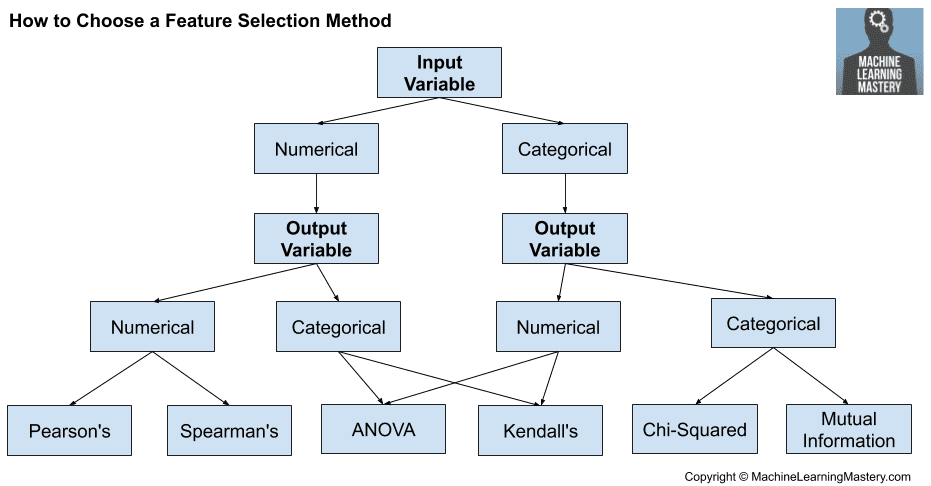

As we have numeric data for input and output the Pearson and Spearman's correlation may be useful to select the essential features to predict the target variable.

**Using correlation coefficients**

Calculate Pearson’s Correlation:

In [ ]:
correlation_matrix = Prepayment_data.corr(method='pearson')
target_correlation = correlation_matrix['PrePaymentAmount'].sort_values(ascending=False)
print(target_correlation)

PrePaymentAmount                             1.000000
Savings                                      0.955605
TotalSavings                                 0.955605
EstimatedMonthlyIncome                       0.953919
MonthlyIncome                                0.953919
OrigUPB_PrePaymentAmount_Ratio               0.816263
DSCR                                         0.807420
RemainingPrincipal_PrePaymentAmount_Ratio    0.796146
OrigUPB                                      0.260918
EMI                                          0.260037
MonthlyLoanPayment                           0.260037
TotalPayment                                 0.259938
LoanAmortizationFactore                      0.259072
InterestAmount                               0.257996
RemainingPrincipal                           0.256455
NumBorrowers                                 0.107632
PropertyState_Frequency                      0.076993
FICO_Category_Encoded                        0.069066
Units                       

Calculate Spearman's Correlation:

In [ ]:
spearman_correlation = Prepayment_data.corr(method='spearman')
# Extracting the correlation of all features with 'PrePaymentAmount'
prepayment_spearman_correlation = spearman_correlation['PrePaymentAmount'].sort_values(ascending=False)
#Display the Spearman correlation values
print(prepayment_spearman_correlation)

PrePaymentAmount                             1.000000
Savings                                      0.896724
TotalSavings                                 0.896724
MonthlyIncome                                0.862442
EstimatedMonthlyIncome                       0.862441
OrigUPB_PrePaymentAmount_Ratio               0.758349
RemainingPrincipal_PrePaymentAmount_Ratio    0.731487
DSCR                                         0.585042
OrigUPB                                      0.518753
EMI                                          0.516941
MonthlyLoanPayment                           0.516941
TotalPayment                                 0.516774
LoanAmortizationFactore                      0.516590
InterestAmount                               0.513508
RemainingPrincipal                           0.510932
NewPrincipalAfterPrePayment                  0.328301
NumBorrowers                                 0.206097
FICO_Category_Encoded                        0.100303
PropertyState_Frequency     

As we have high presence of outliers in the dataset, we can  try also  Kendall's Tau

In [ ]:
kendall_corr = Prepayment_data.apply(lambda x: kendalltau(x, Prepayment_data['PrePaymentAmount'])[0])
print(kendall_corr.sort_values(ascending=False))

PrePaymentAmount                             1.000000
TotalSavings                                 0.724992
Savings                                      0.724991
EstimatedMonthlyIncome                       0.680284
MonthlyIncome                                0.680284
OrigUPB_PrePaymentAmount_Ratio               0.563928
RemainingPrincipal_PrePaymentAmount_Ratio    0.539057
DSCR                                         0.427633
OrigUPB                                      0.367512
EMI                                          0.365661
MonthlyLoanPayment                           0.365661
TotalPayment                                 0.365526
LoanAmortizationFactore                      0.364293
InterestAmount                               0.362468
RemainingPrincipal                           0.359910
NewPrincipalAfterPrePayment                  0.233427
NumBorrowers                                 0.168281
FICO_Category_Encoded                        0.077309
PropertyState_Frequency     

**Summary**

- Highly Correlated Features:

Savings, TotalSavings, EstimatedMonthlyIncome, and MonthlyIncome have strong positive correlations with the target variable PrePaymentAmount across all three correlation methods. These features are important predictors.
DSCR (Debt Service Coverage Ratio) also shows a strong positive correlation.

- Moderately Correlated Features:

Features like OrigUPB (Original Unpaid Principal Balance), EMI, MonthlyLoanPayment, TotalPayment, LoanAmortizationFactor, InterestAmount, and RemainingPrincipal have moderate positive correlations with PrePaymentAmount.

- Low or Negative Correlations:

DTI (Debt-to-Income Ratio) shows a strong negative correlation with PrePaymentAmount across all correlation types, suggesting that as DTI increases, the prepayment amount tends to decrease.

Features such as FICO_Category_Encoded, PropertyState_Frequency, Units, Channel_Frequency, and others have low or near-zero correlations, indicating that they may not be significant predictors of the target variable.



In [ ]:
Prepayment_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR', 'EMI', 'TotalPayment',
       'InterestAmount', 'MonthlyIncome', 'RemainingPrincipal', 'Savings',
       'TotalSavings', 'PrePaymentAmount', 'NewPrincipalAfterPrePayment'],
      dtype='object')

Based on these results we can select these features :
Savings, TotalSavings, EstimatedMonthlyIncome, MonthlyIncome, DSCR, OrigUPB, EMI, MonthlyLoanPayment, TotalPayment, LoanAmortizationFactore, InterestAmount and RemainingPrincipal and DTI.




### **Data** **spliting**

In [ ]:
features = [
    'Savings', 'TotalSavings', 'EstimatedMonthlyIncome', 'MonthlyIncome',
    'DSCR', 'OrigUPB', 'EMI', 'MonthlyLoanPayment',
    'TotalPayment', 'LoanAmortizationFactore', 'InterestAmount', 'RemainingPrincipal', 'DTI','OrigUPB_PrePaymentAmount_Ratio','RemainingPrincipal_PrePaymentAmount_Ratio'
]
target = 'PrePaymentAmount'

X = Prepayment_data[features]
y = Prepayment_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Data** **scaling**

MinMaxScaler:

Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:



```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```





MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.0160632 , 0.0160632 , 0.01051923, ..., 0.671875  , 0.00954848,
        0.0074981 ],
       [0.01213275, 0.01213275, 0.00789941, ..., 0.640625  , 0.01165694,
        0.00913751],
       [0.00582256, 0.00582256, 0.00600362, ..., 0.34375   , 0.01869094,
        0.01914146],
       ...,
       [0.02213984, 0.02213984, 0.02231793, ..., 0.375     , 0.01623074,
        0.01298968],
       [0.01927331, 0.01927331, 0.01945192, ..., 0.53125   , 0.0052839 ,
        0.00411636],
       [0.01542036, 0.01542036, 0.01559967, ..., 0.34375   , 0.01923042,
        0.01547743]])

In [ ]:
X_test_scaled

array([[0.02212619, 0.02212619, 0.02230428, ..., 0.21875   , 0.03969914,
        0.03244457],
       [0.01673094, 0.01673094, 0.01691002, ..., 0.46875   , 0.00824684,
        0.00649569],
       [0.02305412, 0.02305412, 0.01517899, ..., 0.6875    , 0.00934781,
        0.00735434],
       ...,
       [0.01458876, 0.01458876, 0.01476823, ..., 0.53125   , 0.00499069,
        0.00370277],
       [0.0053449 , 0.0053449 , 0.00552605, ..., 0.40625   , 0.01285533,
        0.01012063],
       [0.00780439, 0.00780439, 0.00501436, ..., 0.65625   , 0.01194036,
        0.00942371]])

### **Model** **Training**

Linear Regression MSE: 3.638356713317572e-21, R^2: 1.0
Ridge Regression MSE: 1568721.3279322202, R^2: 0.9972573983351574


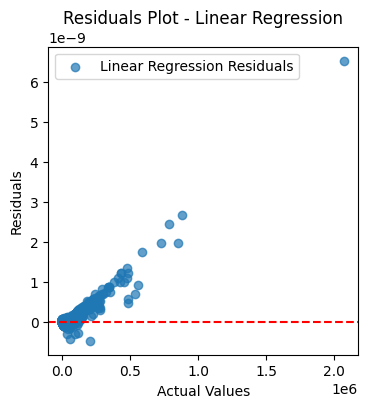

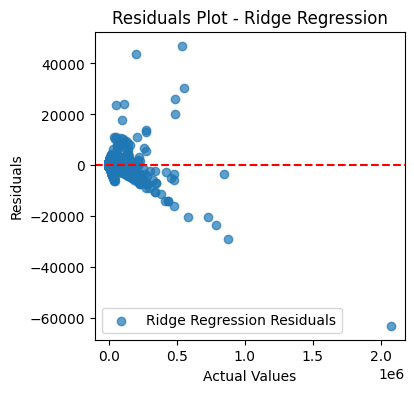

In [ ]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# 2. Ridge Regression
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Linear Regression MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Ridge Regression MSE: {mse_ridge}, R^2: {r2_ridge}")

# Residuals Plot for Linear Regression
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_linear - y_test, label="Linear Regression Residuals", alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Linear Regression')
plt.legend()
plt.show()

# Residuals Plot for Ridge Regression
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_ridge - y_test, label="Ridge Regression Residuals", alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Ridge Regression')
plt.legend()
plt.show()


### **Model** **Evaluation**

Cross validation

In [ ]:
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print(f'Cross-Validated R² Scores: {cv_scores}')
print(f'Mean R² Score: {cv_scores.mean()}')


Cross-Validated R² Scores: [1. 1. 1. 1. 1.]
Mean R² Score: 1.0


Try different metrics

In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_linear)
print(f"Explained Variance Score: {explained_variance}")

# Max Error
max_err = max_error(y_test, y_pred_linear)
print(f"Max Error: {max_err}")

# R^2 Score
r2 = r2_score(y_test, y_pred_linear)
print(f"R^2 Score: {r2}")

# Adjusted R^2 Score
n = len(y_test)
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 Score: {adjusted_r2}")


Mean Absolute Error: 2.3834596424540795e-11
Mean Squared Error: 3.638356713317572e-21
Root Mean Squared Error: 6.031879237283826e-11
Mean Absolute Percentage Error: 1.7642806041680745e-13
Explained Variance Score: 1.0
Max Error: 6.51925802230835e-09
R^2 Score: 1.0
Adjusted R^2 Score: 1.0


In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_ridge)
print(f"Explained Variance Score: {explained_variance}")

# Max Error
max_err = max_error(y_test, y_pred_ridge)
print(f"Max Error: {max_err}")

# R^2 Score
r2 = r2_score(y_test, y_pred_ridge)
print(f"R^2 Score: {r2}")

# Adjusted R^2 Score
n = len(y_test)
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 Score: {adjusted_r2}")


Mean Absolute Error: 767.9690972599082
Mean Squared Error: 1568721.3279322202
Root Mean Squared Error: 1252.486058977193
Mean Absolute Percentage Error: 5.898510839811115
Explained Variance Score: 0.9972574190561367
Max Error: 62887.4848837615
R^2 Score: 0.9972573983351574
Adjusted R^2 Score: 0.9972563396880917


### **Model Saving**

In [ ]:
filename = 'best_prepayment_model.pkl'
joblib.dump(ridge_model, filename)

['best_prepayment_model.pkl']

The score suggest that model performs well with 0.97 whiche indicate a  good fit but still having Mean Squared Error (MSE): 1,568,721.33 which indicate some substantial errors in our predictions.

----> This due to outliers presence  we may handle them in  future.

